# Baseball Project

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [2]:
df.info()
print()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB



W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ERA is a float type data and except ERA all columns are int type data.

In [4]:
print("Data details\n",df.shape)
print("\n")

print("All Columns \n ",df.columns)
print("\n")

print("Check for null values\n",df.isnull().sum())
print("\n")

print("Confirm null \n",df.isnull().sum().sum())
print("\n")

Data details
 (30, 17)


All Columns 
  Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


Check for null values
 W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


Confirm null 
 0




No missing values are present in the given dataset

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:

1.count is same for all columns hence no null values present


2.Mean < Median for columns (Left skewed): W,2B,BB,SO,ER,ERA,SHO,.
however they are close to normal distribution as the difference is small

3.More difference between 75% && max for columns: 'W','R','AB','SO','SB,'RA','CG',SHO'&'SV'..so outliers can exist

In [6]:

#Checking unique values of each columns
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

Observations:

We have number of unique values in each column

In [7]:
#value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

# Data Visualization  -->Univariate Analysis:

W        AxesSubplot(0.125,0.536818;0.133621x0.343182)
R     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
AB     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
H     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
2B    AxesSubplot(0.766379,0.536818;0.133621x0.343182)
3B          AxesSubplot(0.125,0.125;0.133621x0.343182)
HR       AxesSubplot(0.285345,0.125;0.133621x0.343182)
BB        AxesSubplot(0.44569,0.125;0.133621x0.343182)
SO       AxesSubplot(0.606034,0.125;0.133621x0.343182)
SB       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

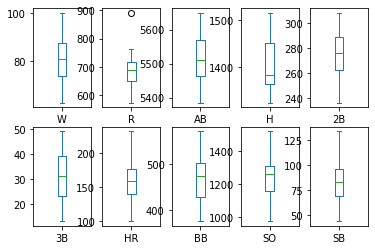

In [8]:
df.iloc[:,0:10].plot(kind='box',subplots=True,layout=(2,5))

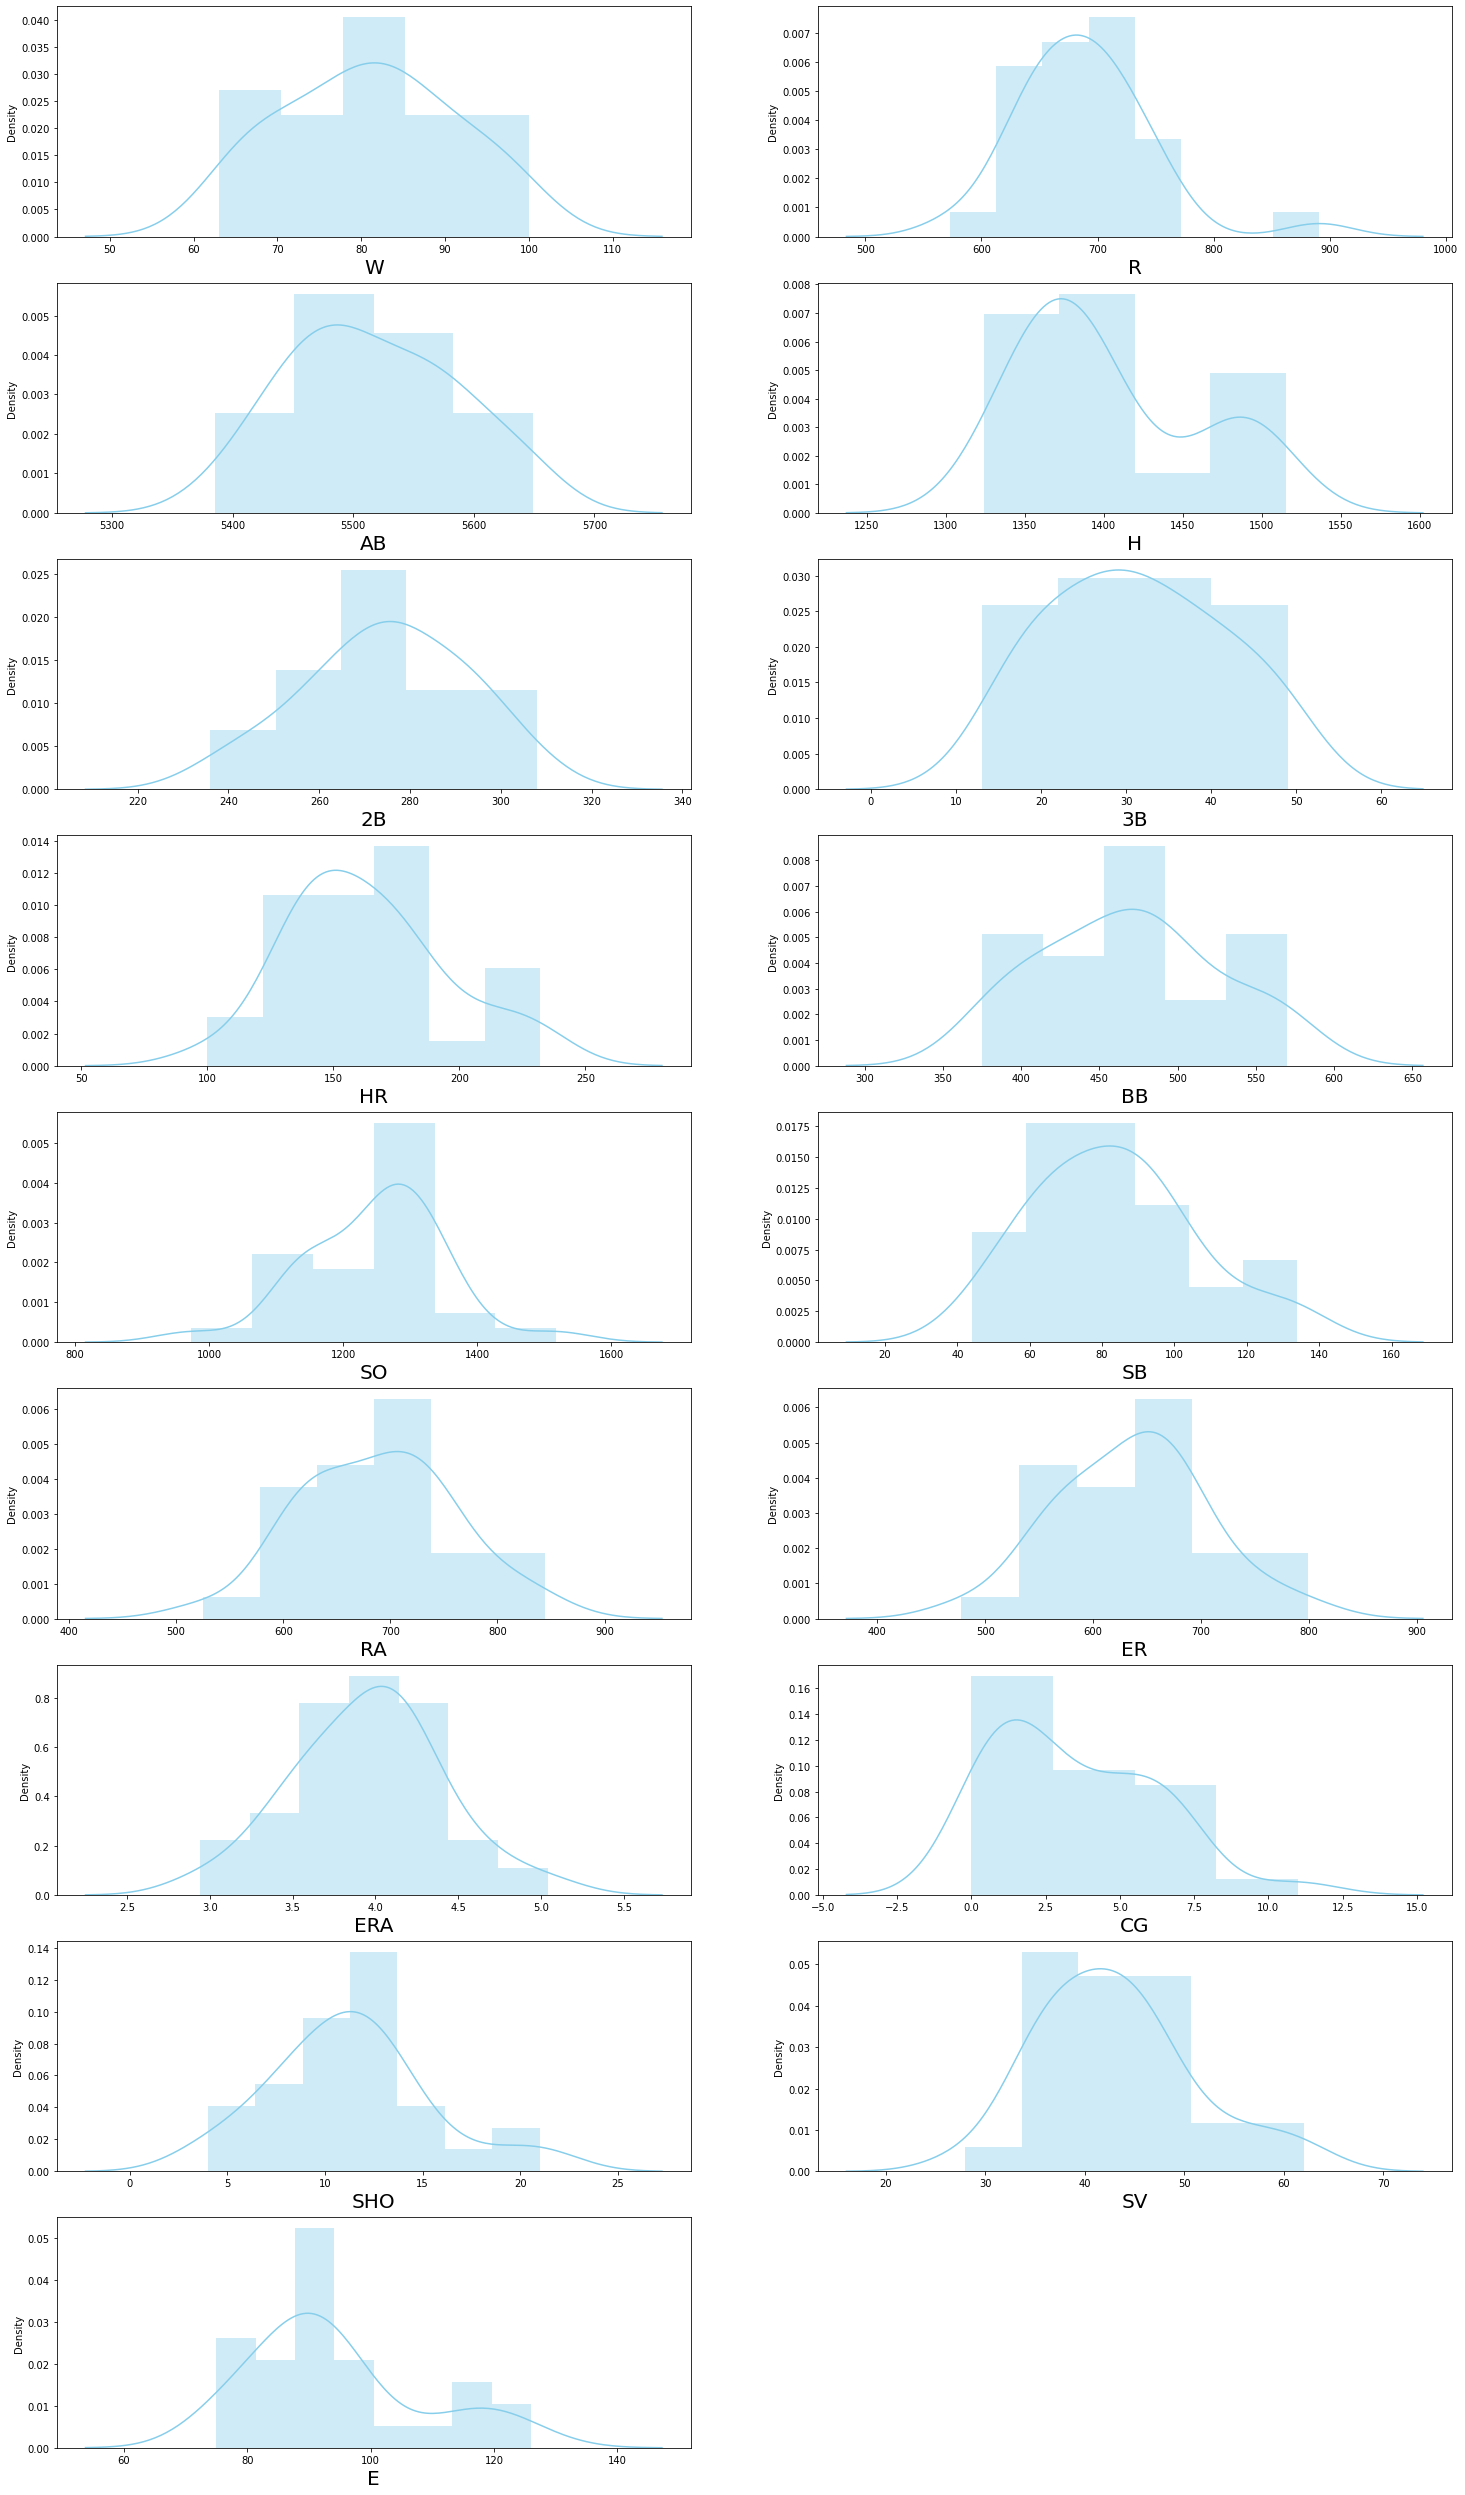

In [9]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed.Except R,SO,CG and E.
           

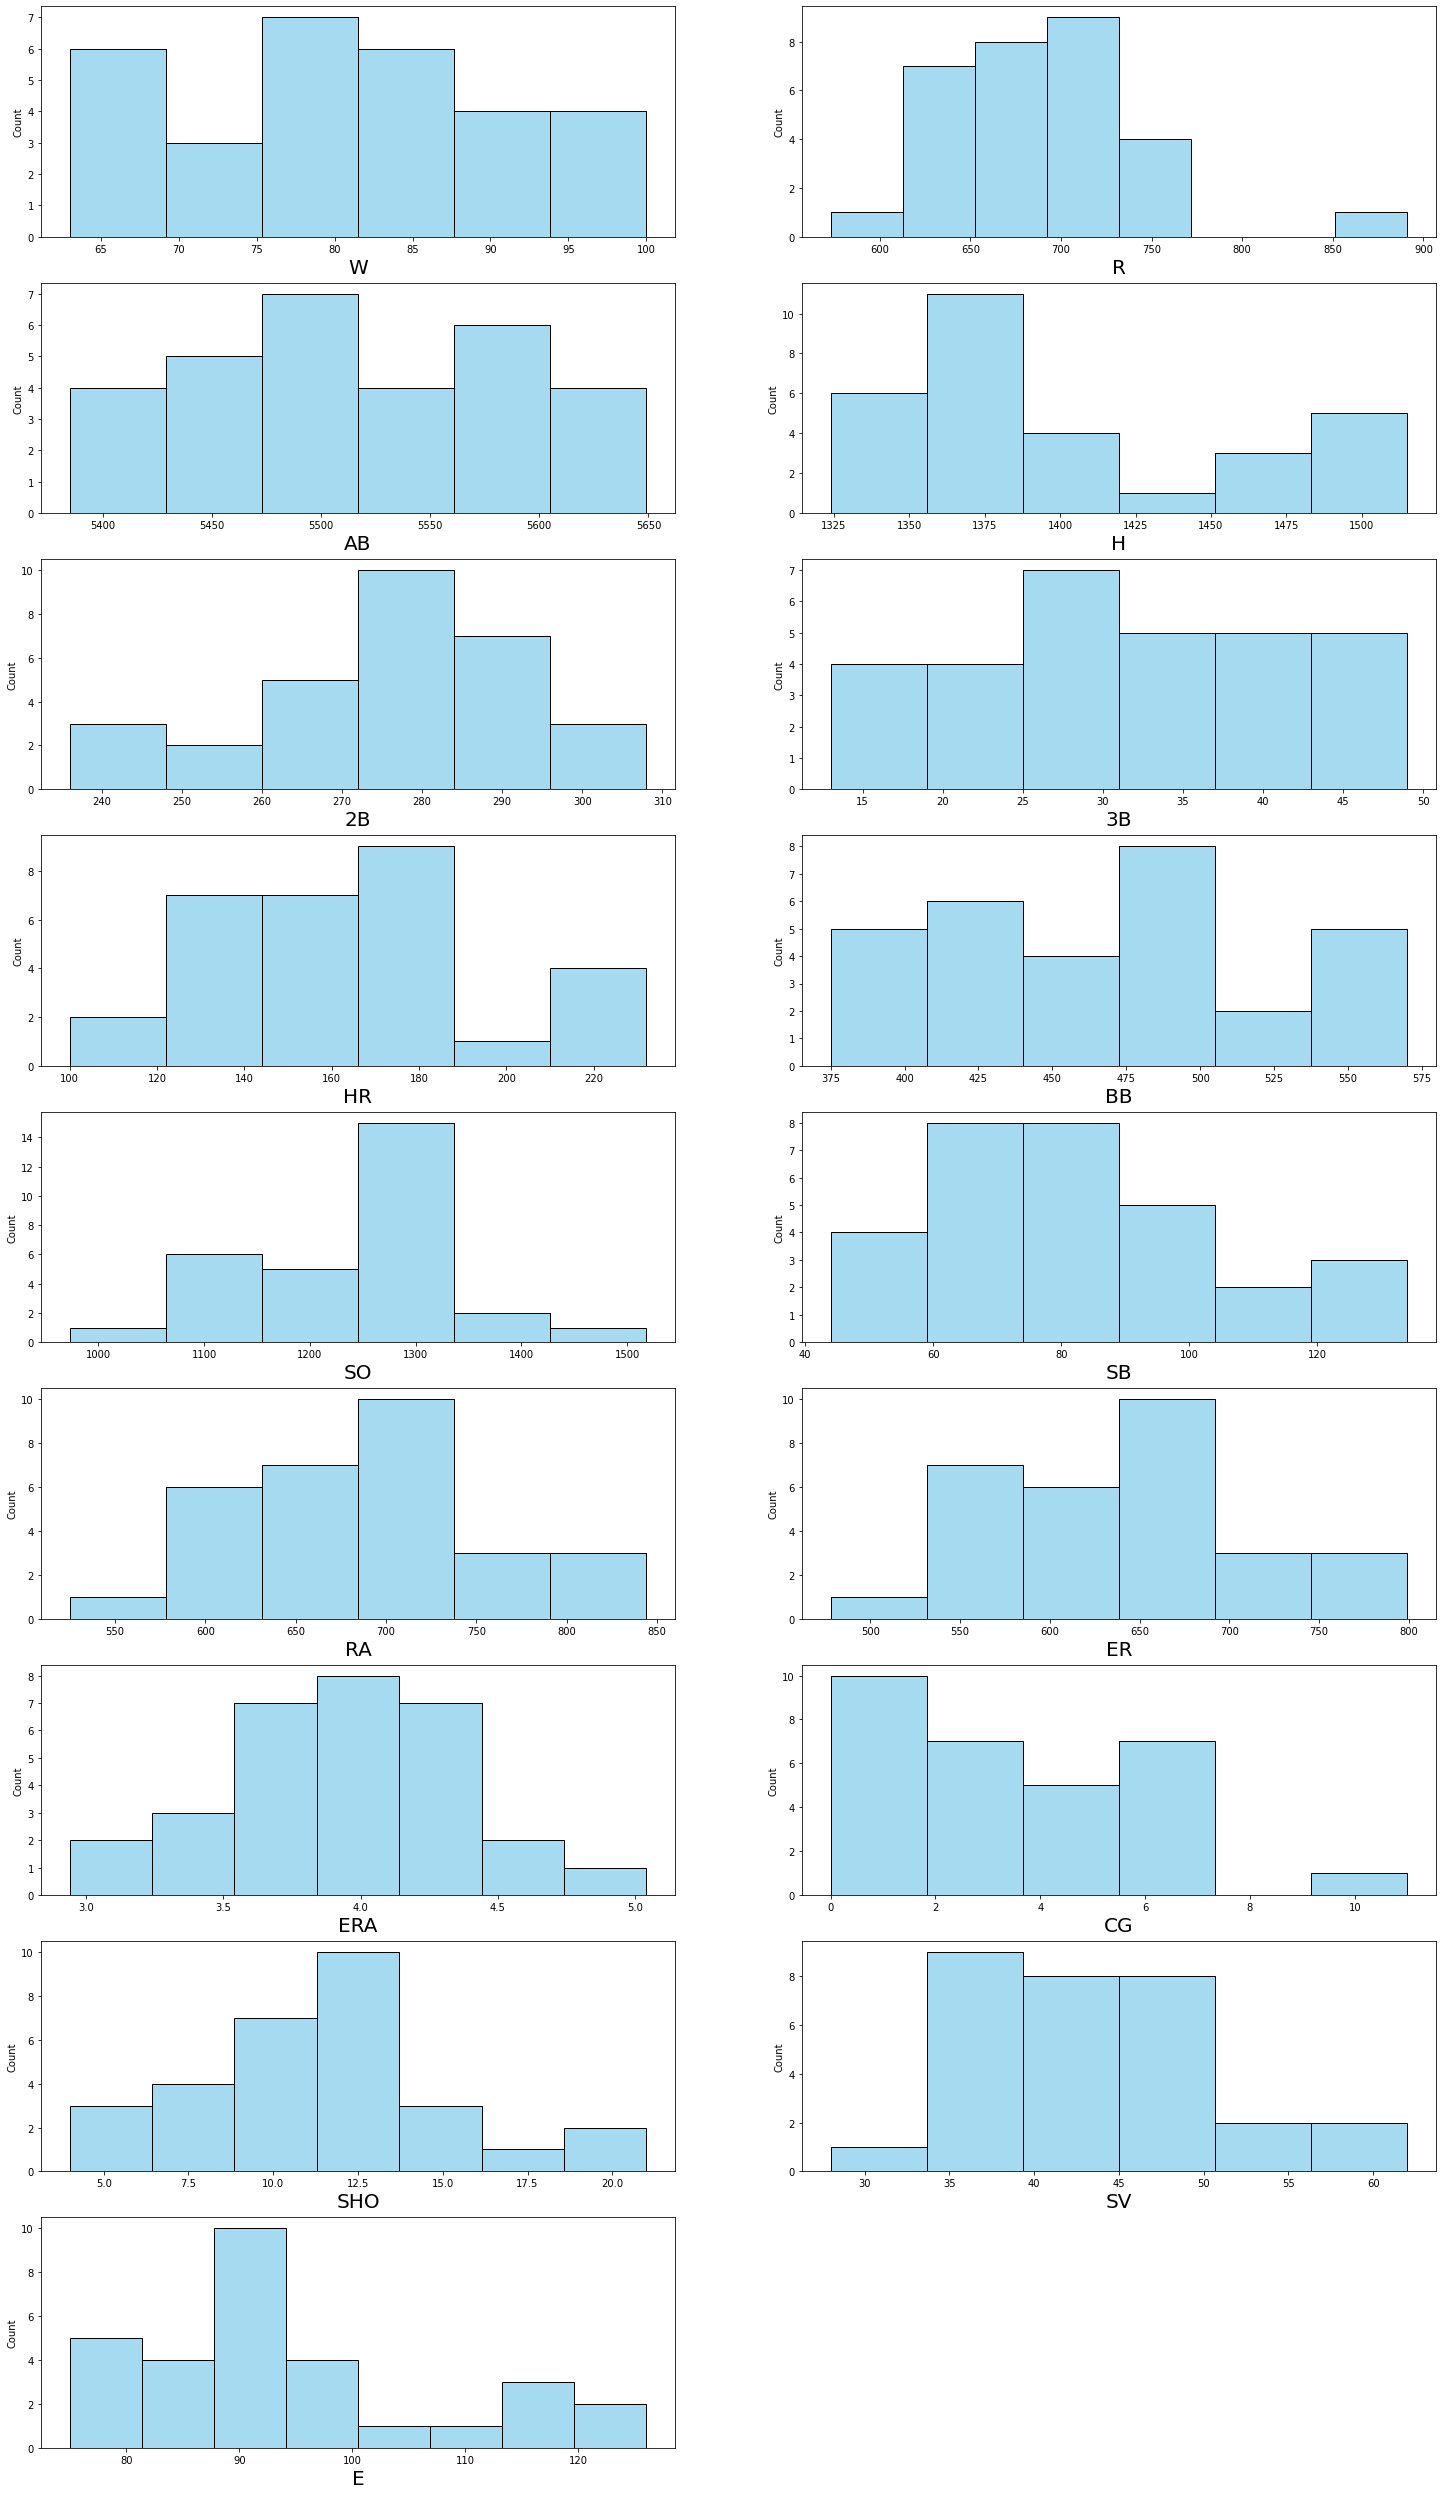

In [10]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

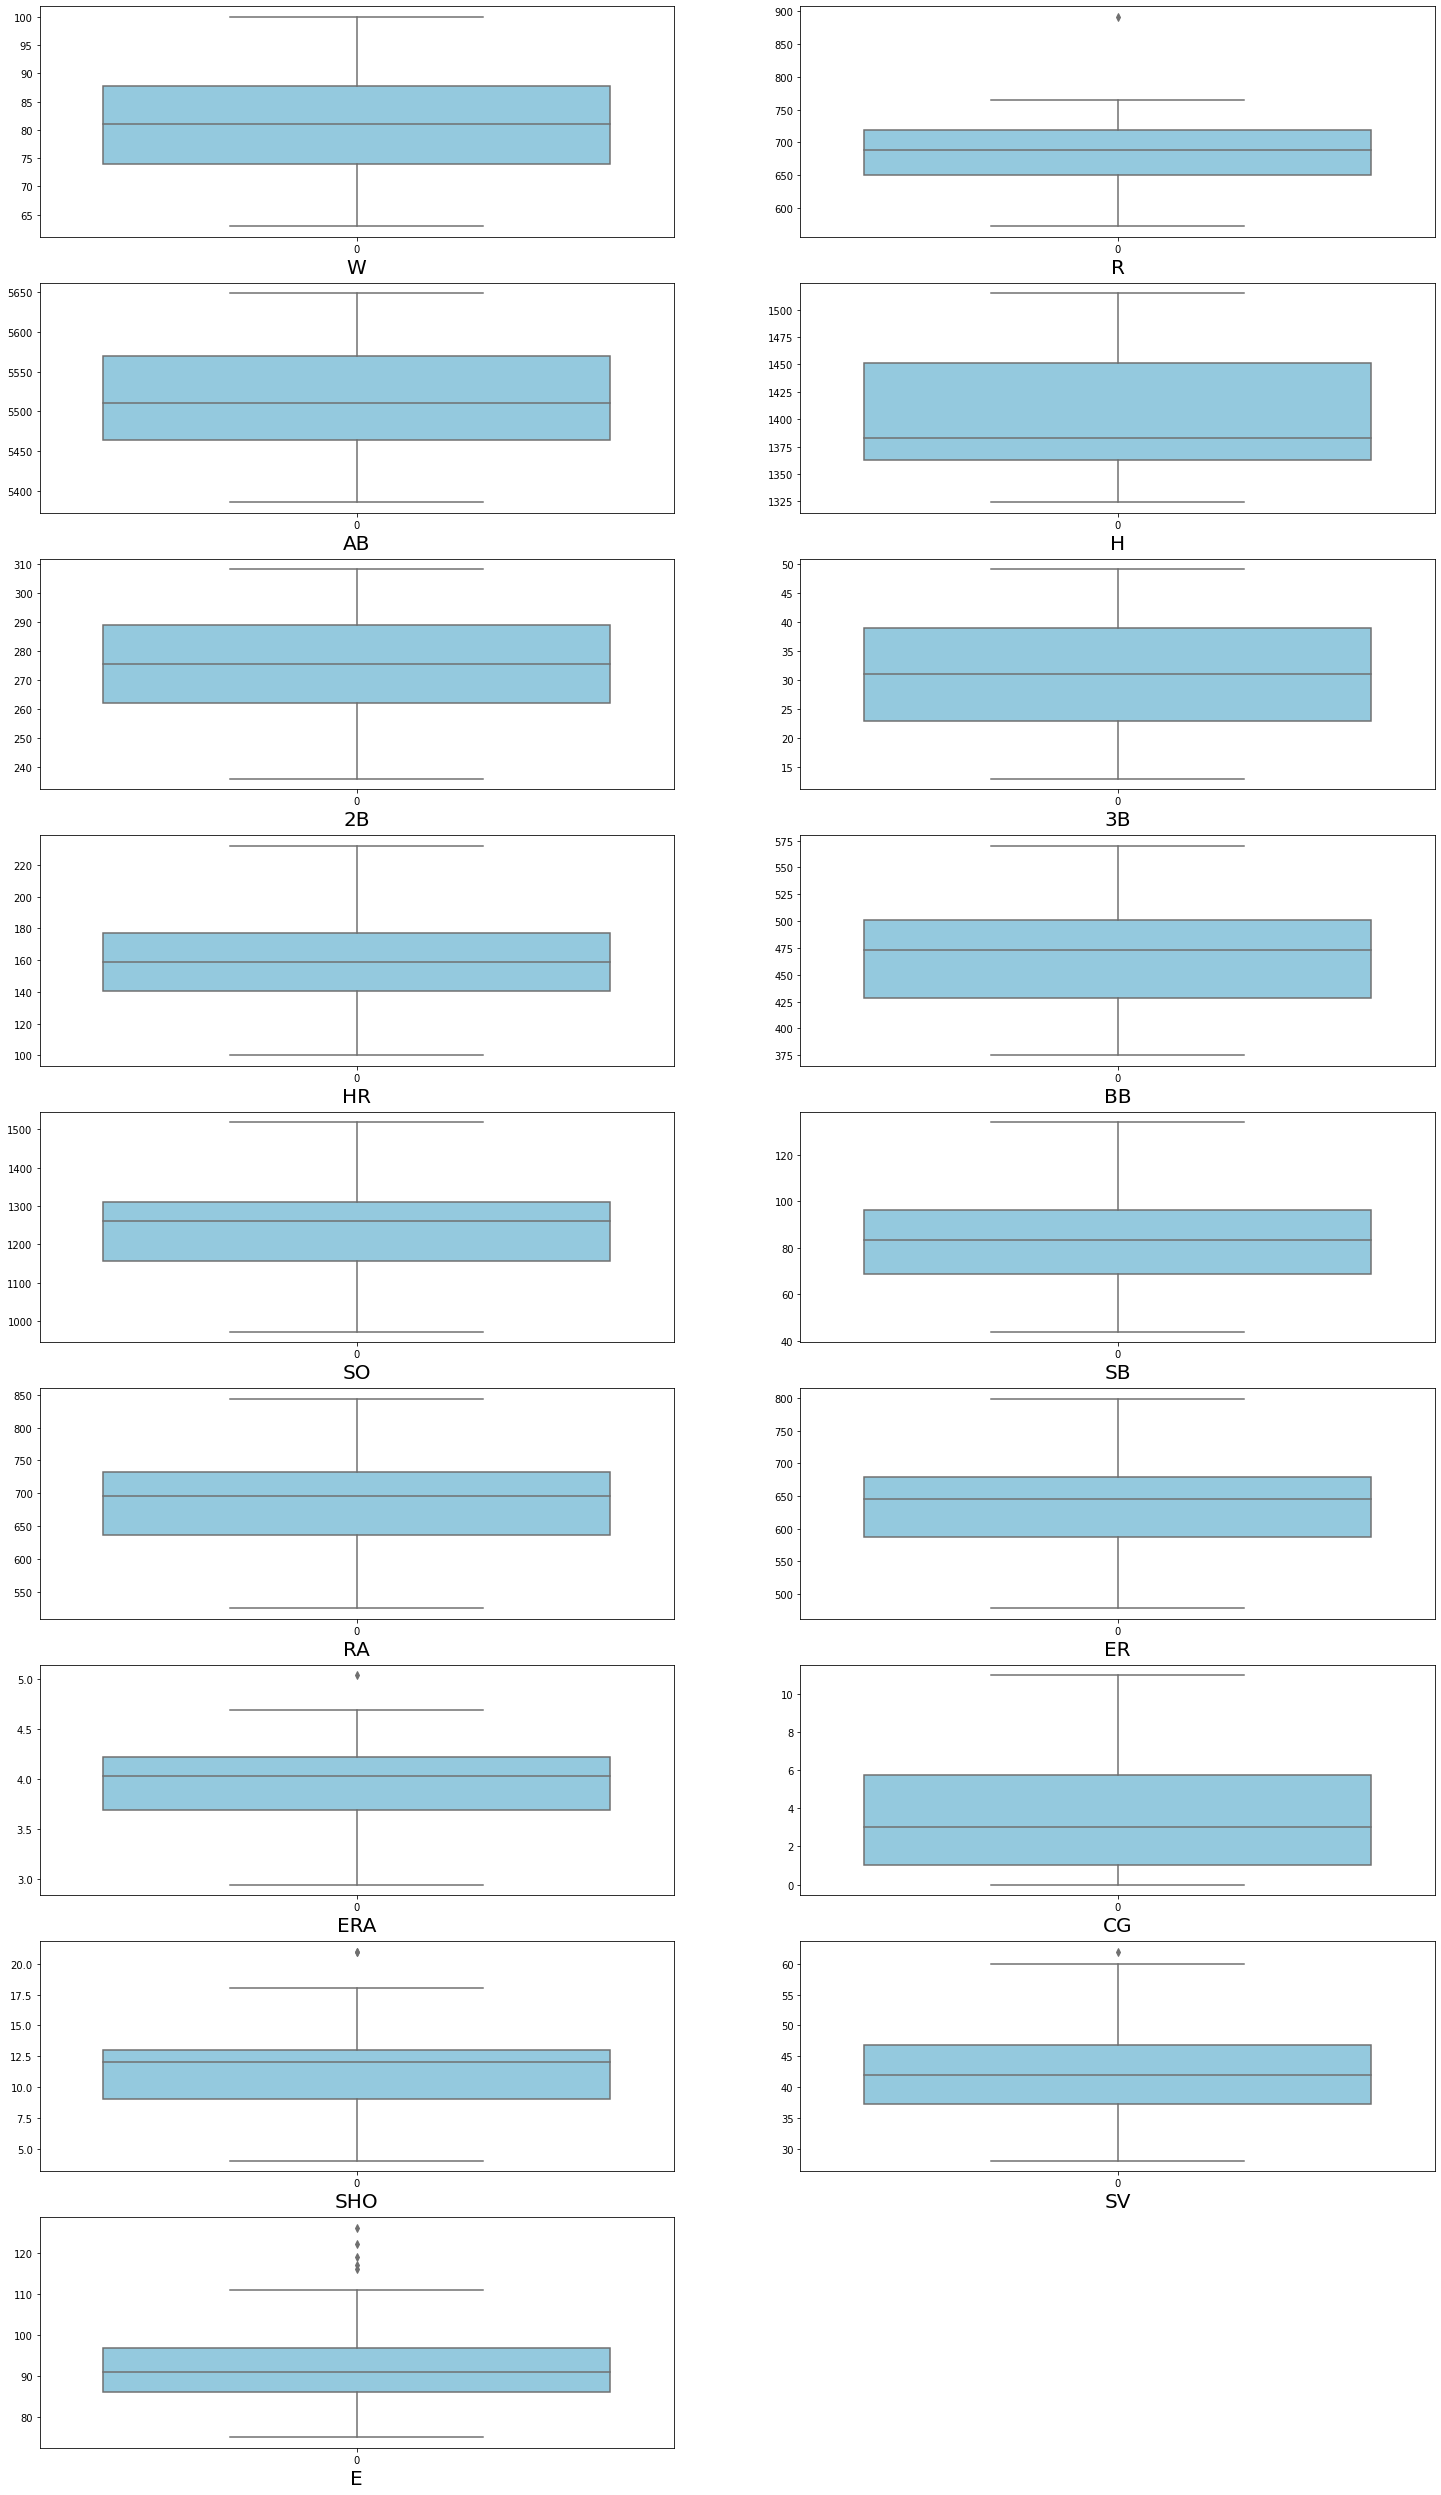

In [11]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

As shown in boxplot R,ERA,SHO,SV and E input variable is having outliers in it. 

So,we need remove outliers from that the input variables.

# Bivariate Analysis:

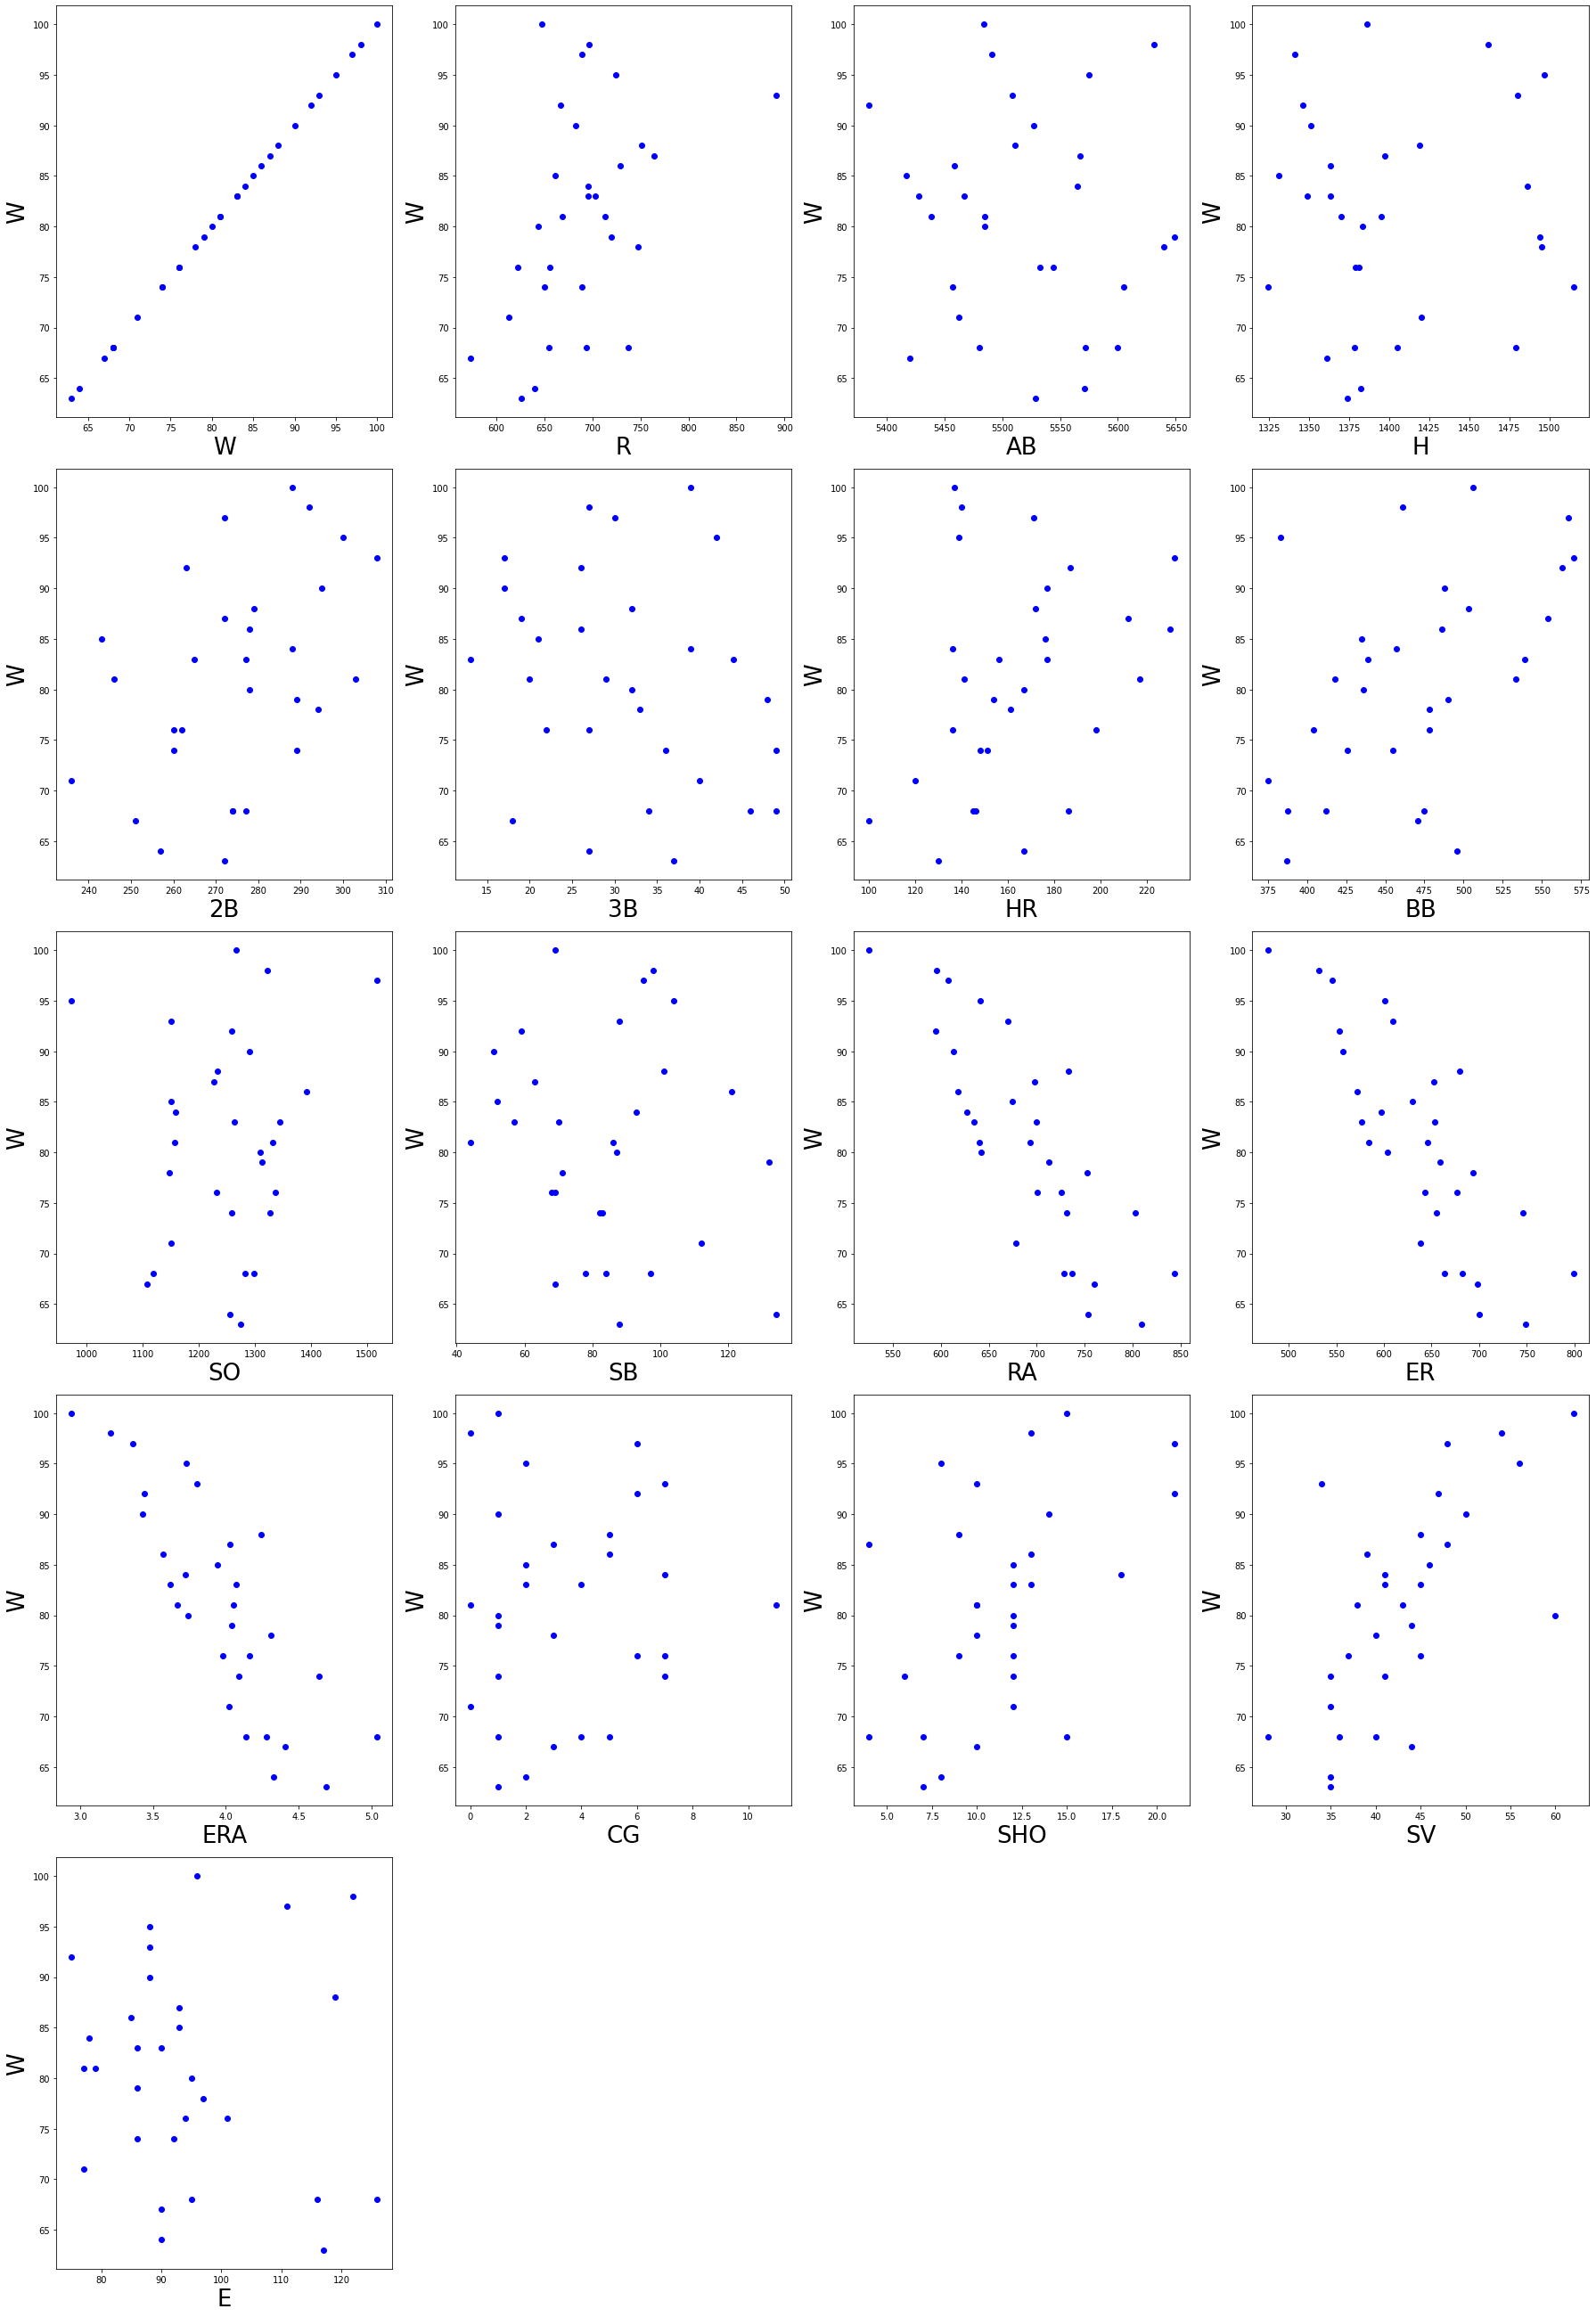

In [12]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

we can see in plot SV,ERA,SHO and R is having almost linear relationship with target variable

and other variables are having non linear relation ship with target variable.

<Figure size 1800x1440 with 0 Axes>

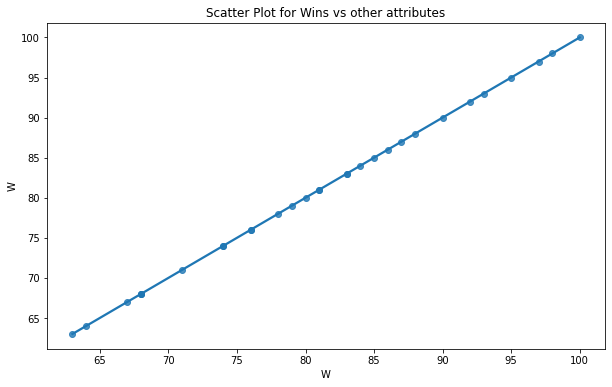

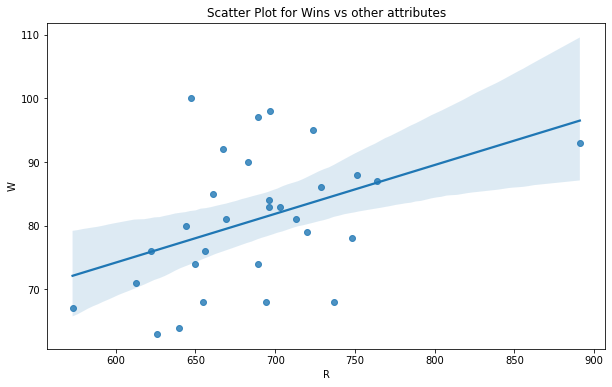

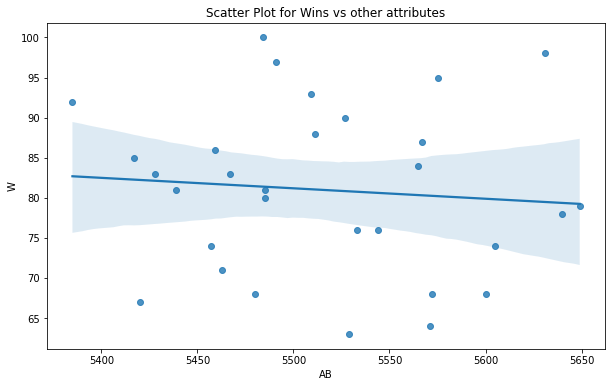

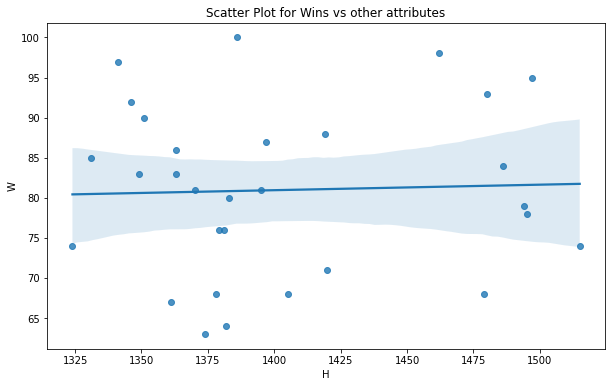

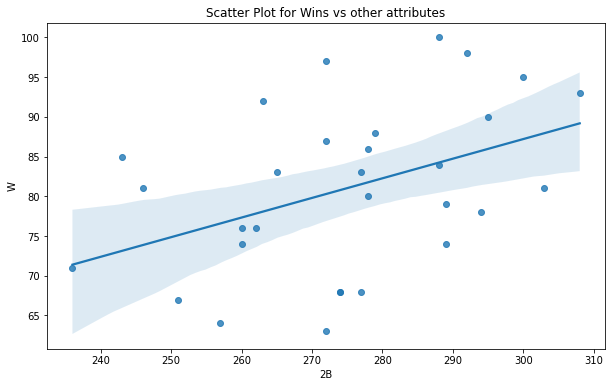

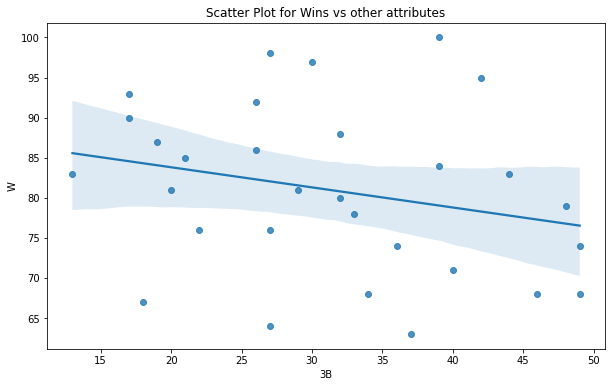

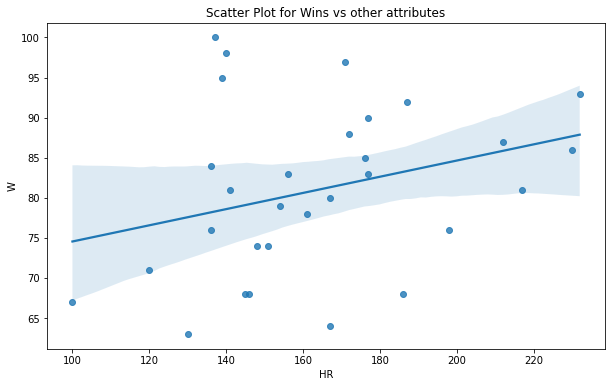

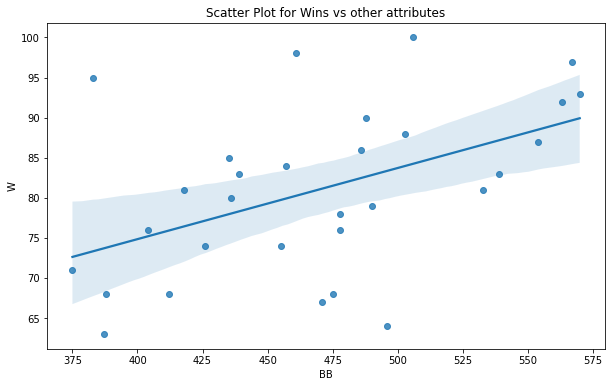

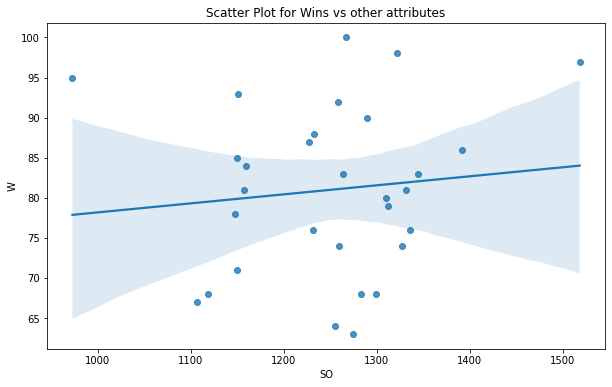

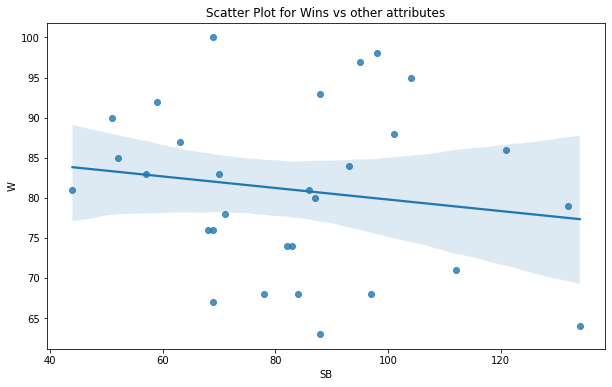

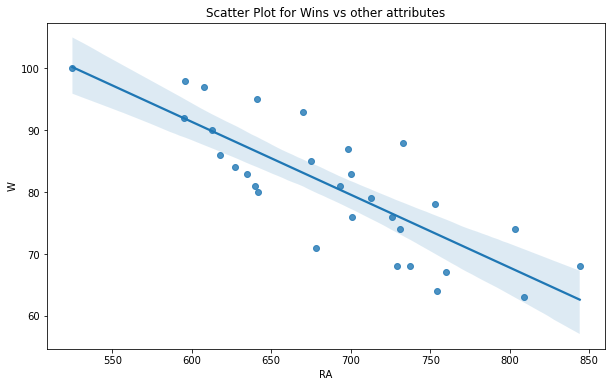

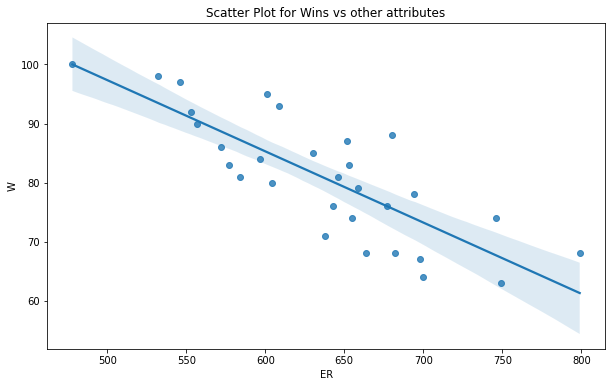

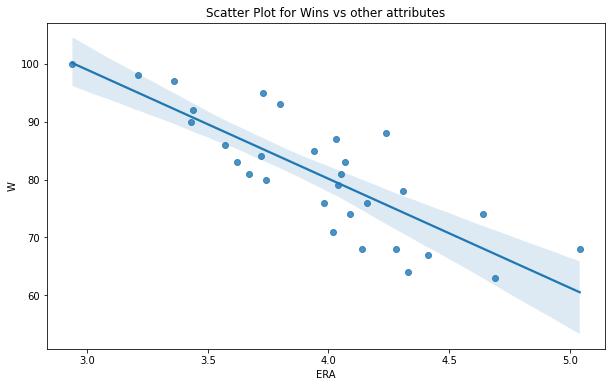

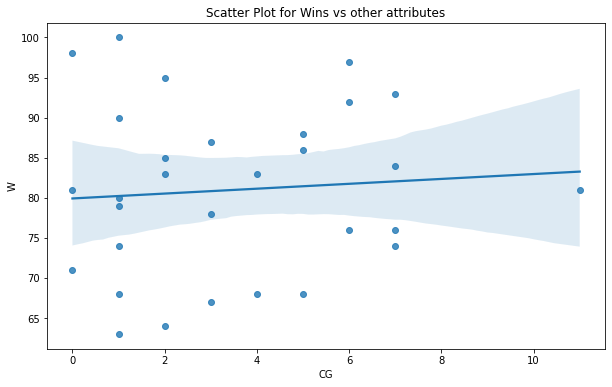

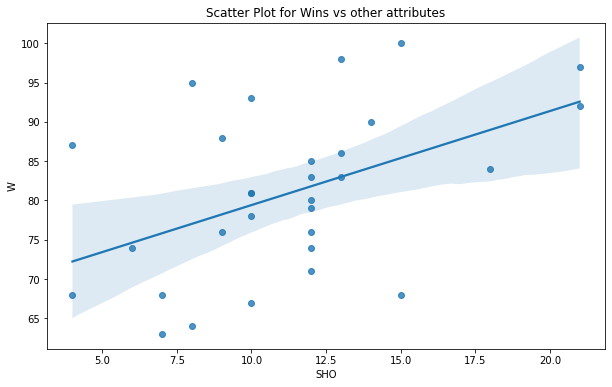

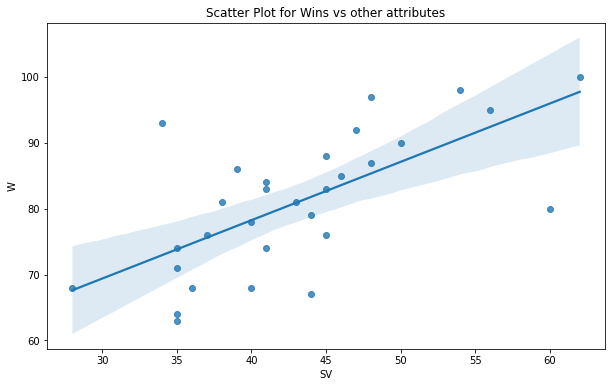

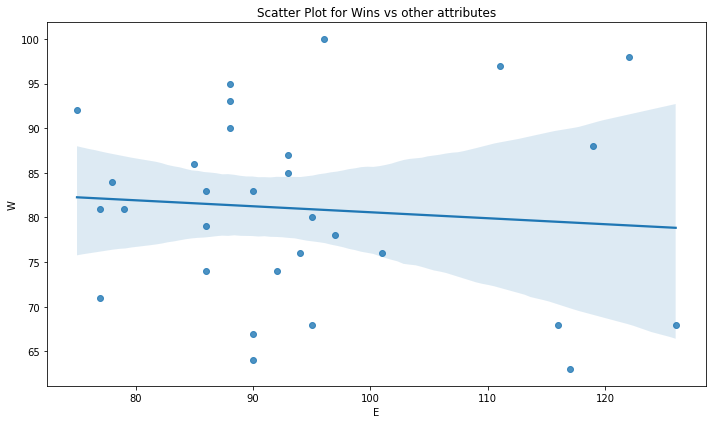

In [13]:
plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(x = df[column], y = df['W'],data = df)
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

RA,ER,ERA have good relation with Win. 

Reset all the Columns does not good Relation with Win because data is scatter across all the places.

# Multivariate Analysis

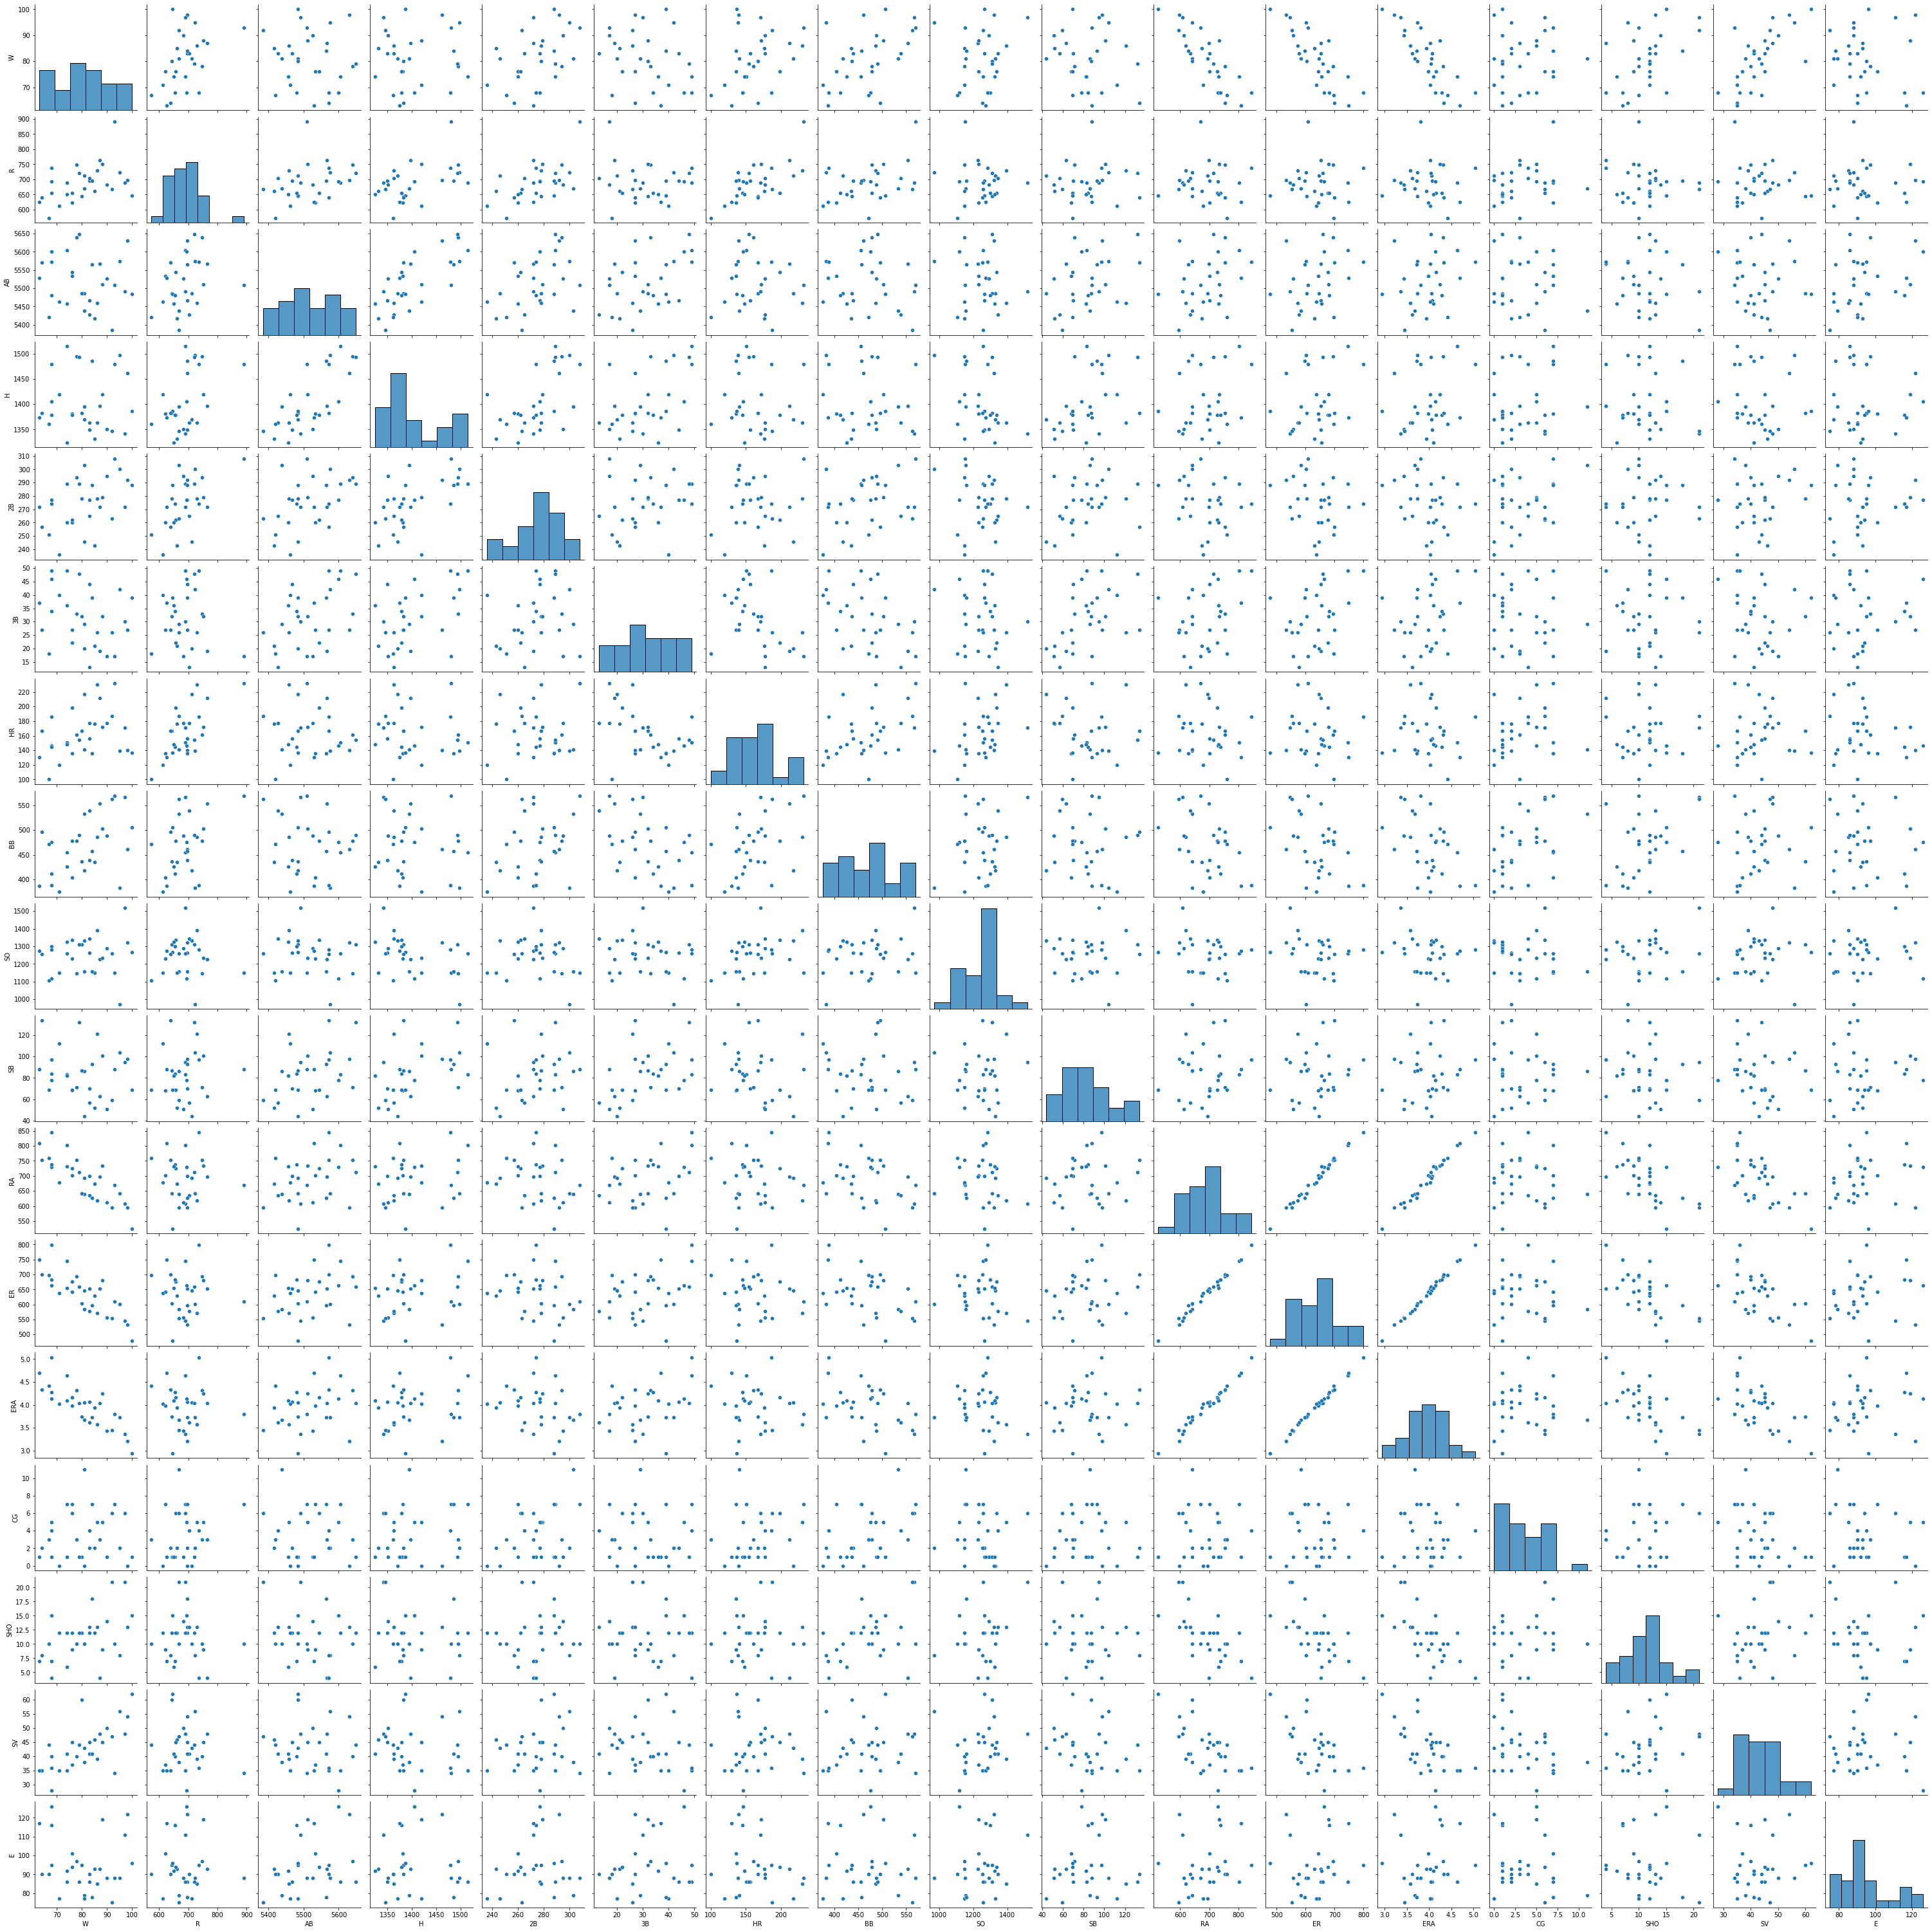

In [14]:
sns.pairplot(df)
plt.show()

Above the pair plots of each pair of features.

I can observe whether they are making good correlation or if they are just scattered with out any pattern.

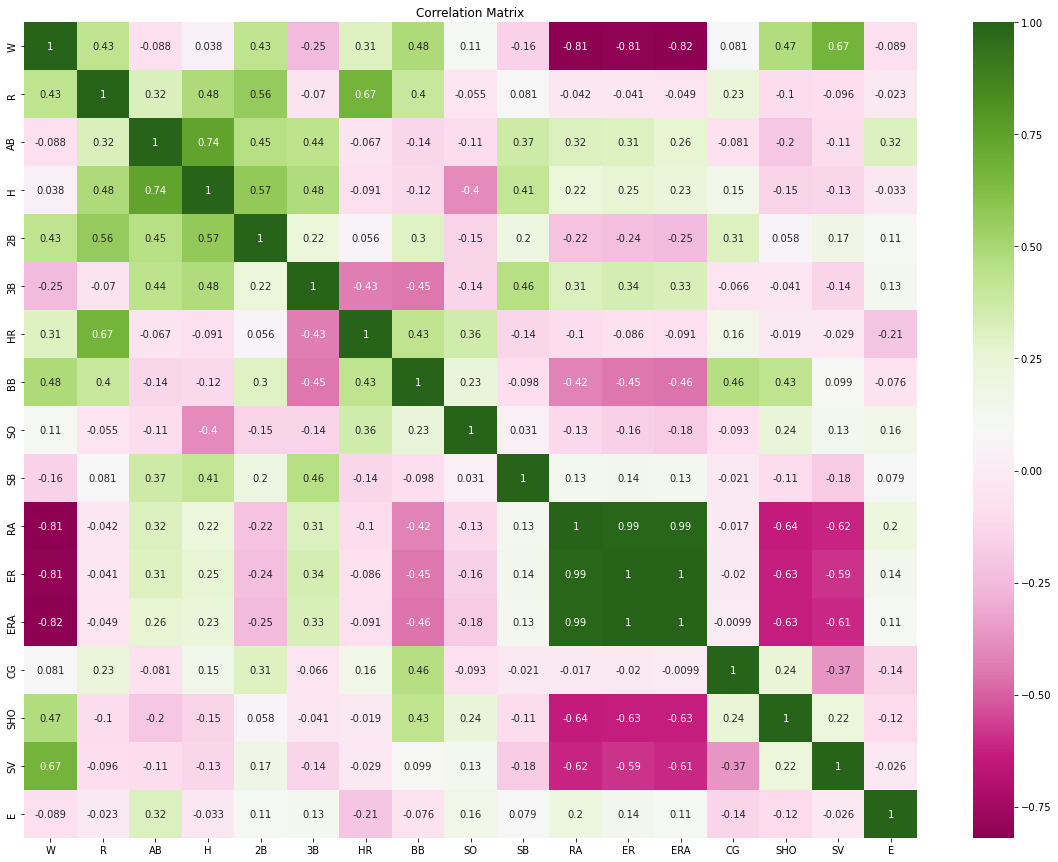

In [15]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True,cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()

In this chart it is showing. it is lightly correlated with each other but RA,ER,ERA columns are highly correlated with each other. 

Also These columns are highly negatively correlated with Wins(W) columns that means there is high impact of these columns on wining. 
We are dropping two columns(er,ra) and keeping ERA from them because these have same kind of effect on wins,
will not affect the prediction model.

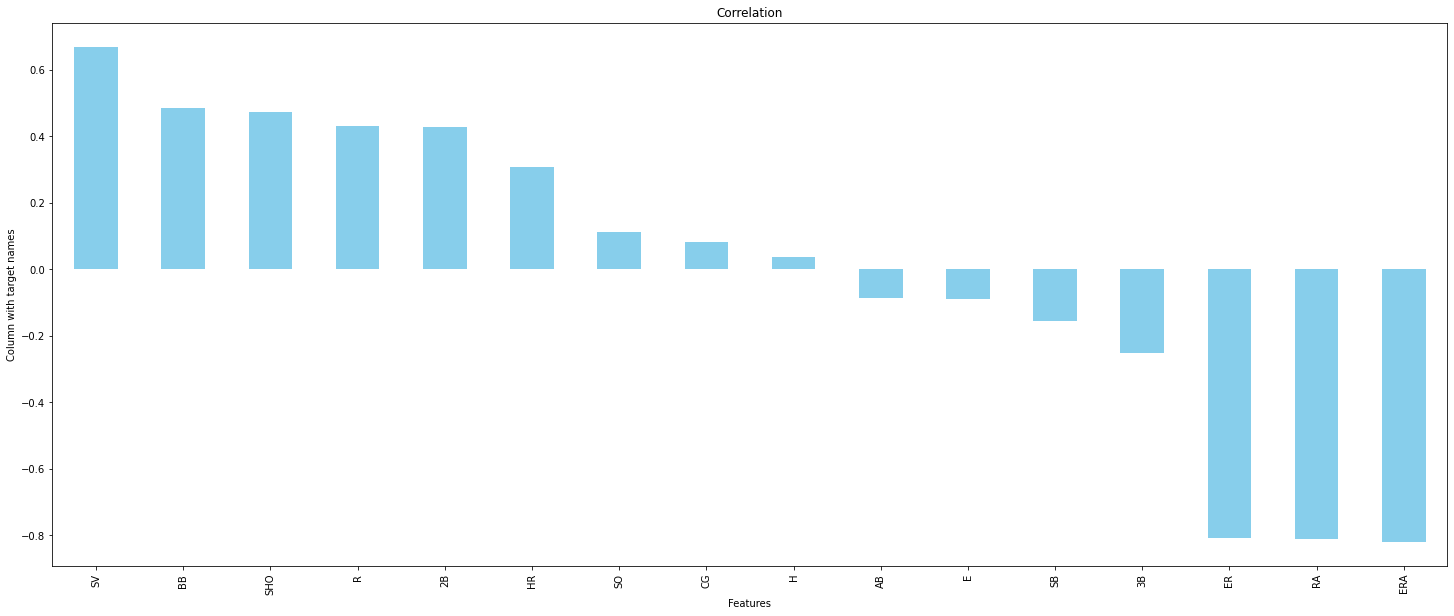

In [16]:
plt.figure(figsize =(25, 10))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

As we can see from the correlation matrix and the graph,ER,RA,ERA have the strongest correlation with wins but in negative nature.

In positive side SV has the highest correlation of 0.67 followed by BB,SHO,R,2B all above 0.4.

Even though ER,RA and ERA are very negatively correlated with wins but they showed highest correlation amongst themselves of over 0.99.

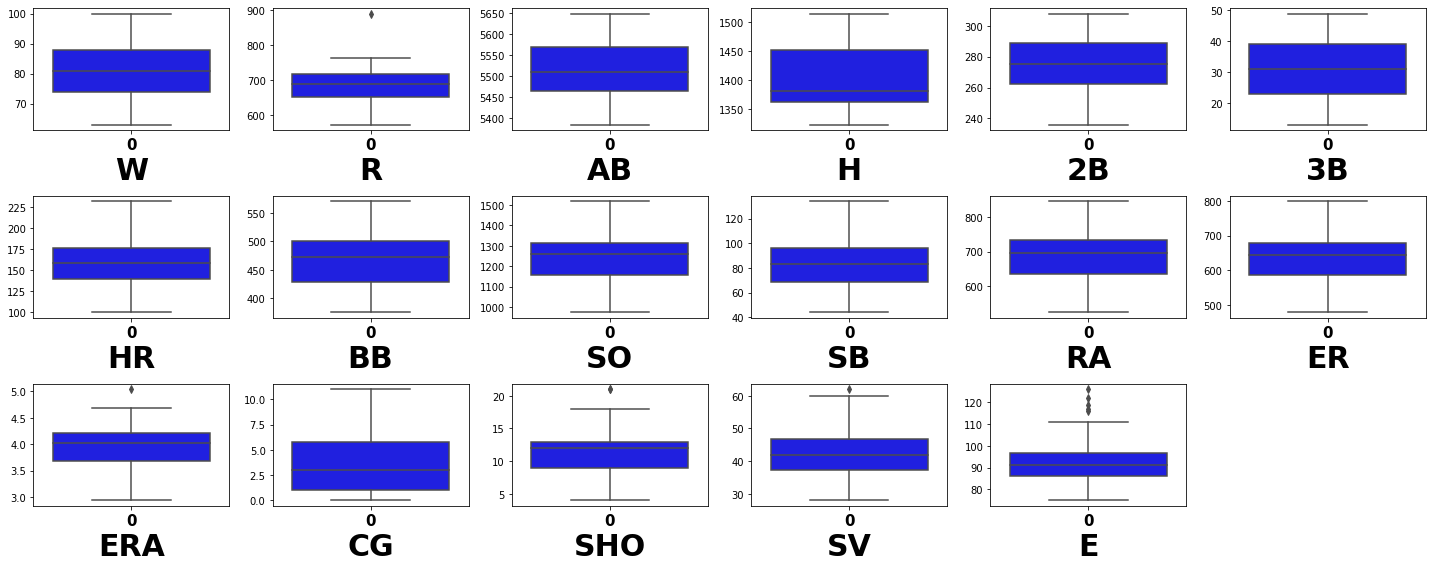

In [17]:
# Checking outliers 
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

there are outliers are R-Runs,ERA-Earned Run average,SHO-Shutout,SV-Saves,E-Errors.

# Removing Outliers   --> Zscore method:

In [18]:
df.shape

(30, 17)

In [19]:
#Features having outliers
features=df[['R','ERA','SHO','SV','E']]

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


Removed outliers by using Zscore.

In [21]:
#Checking shape of new dataset
df_new.shape

(29, 17)

 new dataset after removing outlier==>29 rows and 17 columns of shape

In [22]:
#Checking shape of old dataset
df.shape

(30, 17)

In [23]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df.shape[0]-df_new.shape[0])/df.shape[0]*100,5)
loss_percent_IQR

3.33333

dataloss in zscore method after removing outliers of 3.33% which is less than 10%

# Skewness Check:

In [24]:
#Checking for Skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

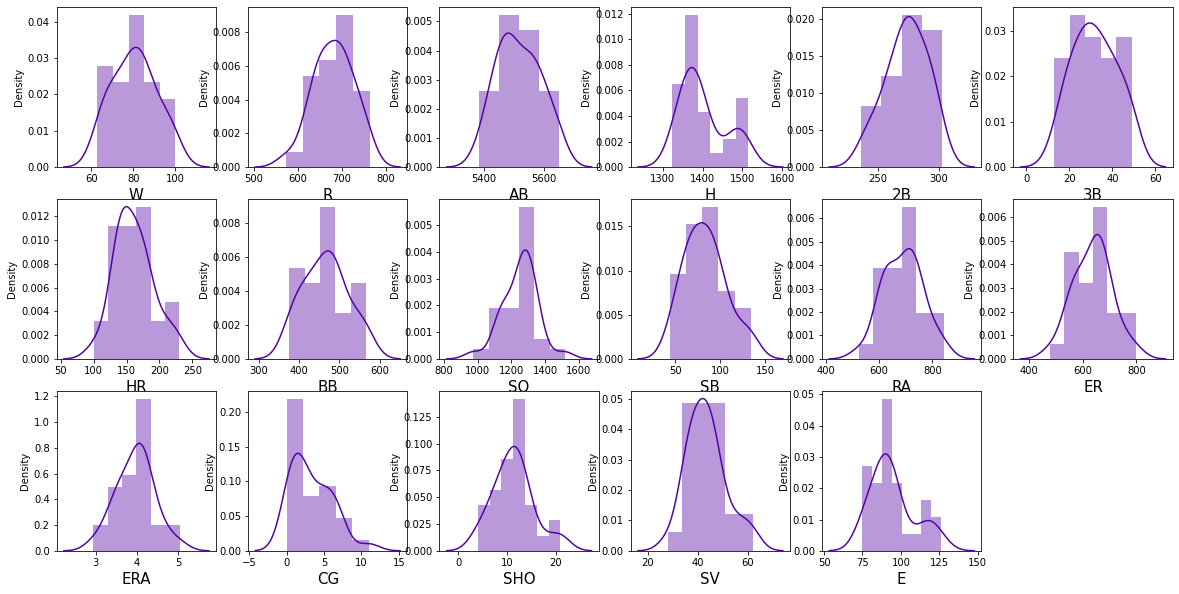

In [25]:
# Skewness of features with continuous data. We don't check skewness on categorical data and in target variable.
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_new:
    if plotnum<=18:
        plt.subplot(3,6,plotnum)
        sns.distplot(df_new[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

# Removing Skewness:

In [26]:
#list of skewed features
skew_features=["H","CG","SHO","SV","E"]

In [27]:
#Removing skewness in H using log1p
df_new["H"]=np.log1p(df_new["H"])

In [28]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [29]:
#Removing skewness using yeo-johnson
df_new[['E','SHO','SV','CG']] = scaler.fit_transform(df_new[['E','SHO','SV','CG']].values)

In [30]:
#Checking skewness after removing skewness
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

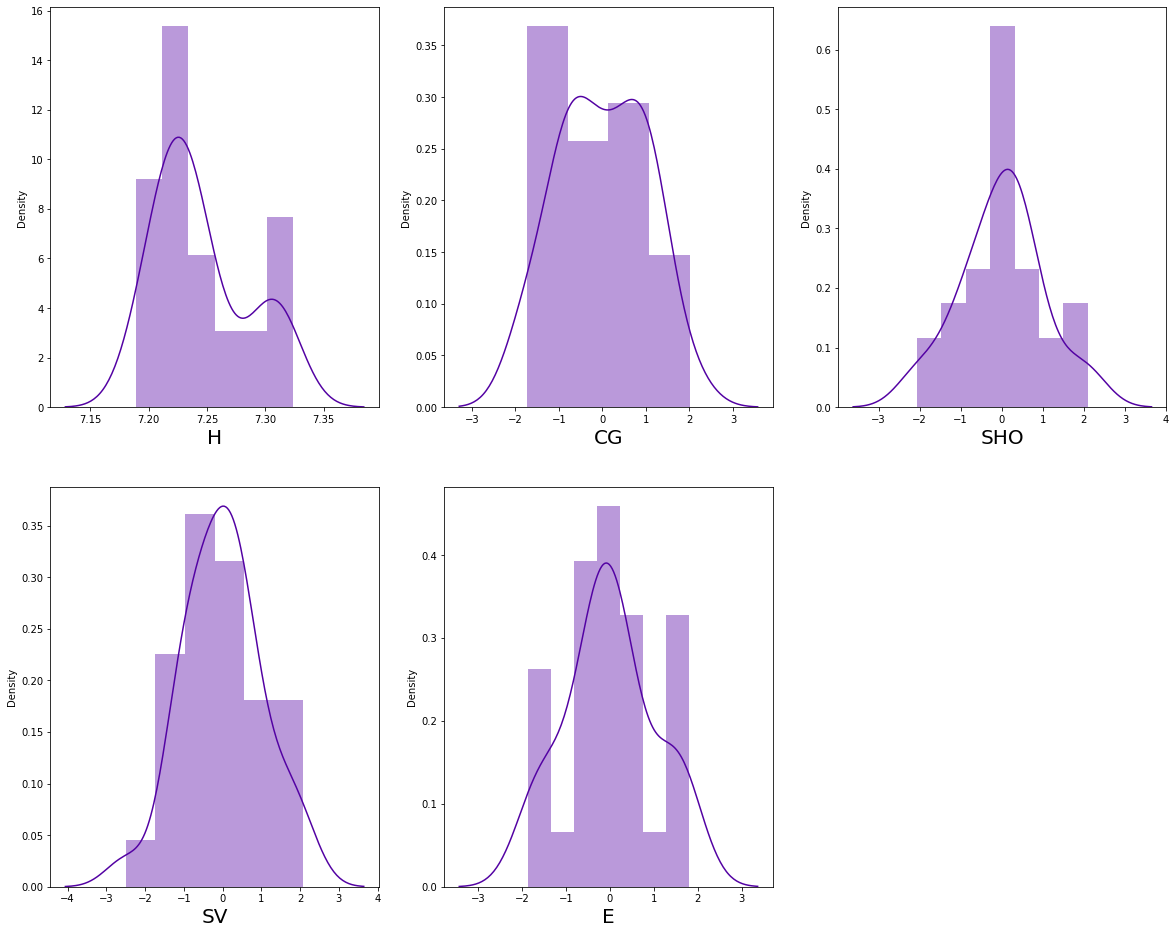

In [31]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[skew_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Splitting the columns:

In [32]:
features = df_new.drop("W",axis=1)
target = df_new["W"]

x=Feature and y=Target

# Scaling Data using StandardScaler:

In [33]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [34]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(features), columns=features.columns)

In [35]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# Variance inflation factor:

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


VIF values i can say that multicolinearity exists in RA,ER,ERA. So let me drop RA and ER columns to avoid multicolinearity.

In [37]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [38]:
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


I can see Dependent variables after removing multicolinearity.

In [39]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Still VIF is high for 2 columns so let me drop ERA.

In [40]:
#Droping RA
X = X.drop(["ERA"],axis=1)

In [41]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Multicolinearity issue is solved.

In [42]:
features = X
display(features)
display(target)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.770649,-0.513555,0.312020,1.554265


0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

# Splitting the data for training and testing:

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Let find the best random state:

In [44]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9710828226239957
At random state0, The test accuracy is :-0.2462932587590696


At random state1, The training accuracy is :-0.9582634742305564
At random state1, The test accuracy is :-0.5140869434176466


At random state2, The training accuracy is :-0.9314173823543523
At random state2, The test accuracy is :--0.30914070280565586


At random state3, The training accuracy is :-0.9529328726230197
At random state3, The test accuracy is :-0.5712782230673308


At random state4, The training accuracy is :-0.9492897223584699
At random state4, The test accuracy is :-0.7944151210741035


At random state5, The training accuracy is :-0.9507521001289223
At random state5, The test accuracy is :-0.2478526310603073


At random state6, The training accuracy is :-0.950804107694359
At random state6, The test accuracy is :-0.7105997881962774


At random state7, The training accuracy is :-0.9346483446222347
At random state7, The test accuracy is :-0.8598820195

random state=99 giving highest accuracy,choosing that as random state.

In [45]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=99)

In [46]:
x_train.shape

(23, 14)

In [47]:
y_train.shape

(23,)

In [48]:
x_test.shape,y_test.shape

((6, 14), (6,))

# Model Building--->  Regression Algorithms:

In [49]:
#Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# Linear Regression:

In [50]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9253071335016249


In [51]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 11.664692086596434
MAE: 2.8586048667157997
r2_score: 0.9236153664574798


LR is giving me 92% r2_score

# Few more  Algorithms

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor


models = [LinearRegression(),XGBRegressor(),
         DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),
         SVR()]

Training_r2score =[]
Testing_r2score=[]
Diff_Train_Test_r2score =[]
mape_train =[]
mape_test =[]
Diff_mape_TrainTest =[]
model_score=[]
# MSE =[]
# RMSE=[]

for i in range(6):
    models[i].fit(x_train,y_train)
    
    print(f'{models[i]} :  ')
    pred_train = models[i].predict(x_train)
    pred_test= models[i].predict(x_test)
    #print("Training accuracy is",r2_score(y_train,pred_train)*100)
    Training_r2score.append(r2_score(y_train,pred_train)*100)
    #print("Testing accuracy is",r2_score(y_test,pred_test)*100)
    Testing_r2score.append(r2_score(y_test,pred_test)*100)
    #print("Difference between Training and Testing accuracy is",(r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
    Diff_Train_Test_r2score.append((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100))
    #print("\n")
    # mean_absolute_percentage_error as mape
    #print('Training Error :', mape(y_train,pred_train))
    mape_train.append(mape(y_train,pred_train))
    #pred_val = models[i].predict(x_val)
    #print('Validation error :',mape(y_test,pred_test))
    mape_test.append(mape(y_test,pred_test))
    #print("Difference between Training and Validation error is",(mape(y_train,pred_train)*100)-(mape(y_test,pred_test)*100))
    Diff_mape_TrainTest.append((mape(y_train,pred_train)*100)-(mape(y_test,pred_test)*100))
    #print("\n")
    
    # predicting score
    modelscore = models[i].score(x_test,y_test)
    #print('score of model is : ',modelscore)
    model_score.append(modelscore)


ModelsMetrics_list = {'ModelAlgo':models,'Training_r2score':Training_r2score,'Testing_r2score':Testing_r2score,'Diff_Train_Test_r2score':Diff_Train_Test_r2score,'mape_train':mape_train,'mape_test':mape_test,'Diff_mape_TrainTest':Diff_mape_TrainTest,'model_score':model_score}

dfModels_metrics = pd.DataFrame(ModelsMetrics_list,columns =['ModelAlgo','Training_r2score','Testing_r2score','Diff_Train_Test_r2score','mape_train','mape_test', 'Diff_mape_TrainTest','model_score'])
                                                                                                                                                                  
dfModels_metrics

LinearRegression() :  
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :  
DecisionTreeRegressor() :  
KNeighborsRegressor() :  
SGDRegressor() :  
SVR() :  


,ModelAlgo,Training_r2score,Testing_r2score,Diff_Train_Test_r2score,mape_train,mape_test,Diff_mape_TrainTest,model_score
0,LinearRegression(),92.530713,92.353807,-0.176906,0.024755,0.036397,-1.164234,0.923538
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",100.000000,74.437193,-25.562807,0.000004,0.062948,-6.294377,0.744372
2,DecisionTreeRegressor(),100.000000,66.132556,-33.867444,0.000000,0.075686,-7.568629,0.661326
3,KNeighborsRegressor(),63.733483,63.558631,-0.174852,0.062050,0.093967,-3.191622,0.635586
4,SGDRegressor(),91.853128,92.651035,0.797907,0.026798,0.032369,-0.557103,0.926510
5,SVR(),20.269133,14.069085,-6.200048,0.082046,0.131243,-4.919730,0.140691


In [53]:
cvscore =[]
modelscore=[]
Diff_cv_model_score =[]
MSE =[]
RMSE=[]
for i in range(6):    
    print(f'{models[i]} :  ')
    pred_val = models[i].predict(x_test)
    lss=r2_score(y_test,pred_val)
    lsscore_selected=cross_val_score(models[i],features,target,cv=2).mean()
    #print("The CV score is:",lsscore_selected*100,"\nThe model score is:",lss*100)
    cvscore.append(lsscore_selected*100)
    modelscore.append(lss*100)
    #print("Difference is:",lss-lsscore_selected)
    Diff_cv_model_score.append(lss-lsscore_selected)
    #print("\n")
    # display error rate
    #print('calculating the error--->')
    # calculating mean squared error
    MeanSqError = mean_squared_error(y_test,models[i].predict(x_test))
    # calculating root mean squared error
    RootMSE = np.sqrt(MeanSqError)
    # display MSE
    #print('mean squared error is : ',MeanSqError)
    MSE.append(MeanSqError)
    # display RMSE
    #print('root mean squared error is : ',RootMSE)
    RMSE.append(RootMSE)

cvmodel_list = {'ModelAlgo':models,'cvscore':cvscore,'modelscore':modelscore,'Diff_cv_model_score':Diff_cv_model_score,'MSE':MSE,'RMSE':RMSE}

dfcvmodel_score = pd.DataFrame(cvmodel_list,columns =['ModelAlgo','cvscore','modelscore','Diff_cv_model_score','MSE','RMSE'])
                                                                                                                                                                  
dfcvmodel_score

LinearRegression() :  
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) :  
DecisionTreeRegressor() :  
KNeighborsRegressor() :  
SGDRegressor() :  
SVR() :  


,ModelAlgo,cvscore,modelscore,Diff_cv_model_score,MSE,RMSE
0,LinearRegression(),-166.088765,92.353807,2.584426,11.664692,3.415361
1,"XGBRegressor(base_score=0.5, booster='gbtree',...",28.718115,74.437193,0.457191,38.997483,6.244796
2,DecisionTreeRegressor(),-29.118157,66.132556,0.952507,51.666667,7.187953
3,KNeighborsRegressor(),12.057075,63.558631,0.515016,55.593333,7.456094
4,SGDRegressor(),-586.681899,92.651035,6.793329,11.211254,3.348321
5,SVR(),-19.373161,14.069085,0.334422,131.092384,11.449558


Observations:

Conclusion Out of all the models **LinearRegression** is giving the least value MSE , which means predictions made by this model are close to the real values as compared to the other model.

Out of all algorithms checked, **LinearRegression** can be  selected for hyper parameter tuning due to Low RMSE

# Regularization



Regularization techniques help reduce the chance of overfitting and help us get an optimal model.

1.Lasso Regression(L1- tends to make coefficients to absolute zero)

2. Ridge Regression(L2-reduce only the overfitting)

Regularization tries to reduce the variance of the mode

In [54]:
#Lasso, Ridge ,ElasticNet -->to be done here
# Checking accuracy with Lasso Regressor
from sklearn.linear_model import Lasso
lsr=Lasso()
lsr.fit(x_train,y_train)
predlsr=lsr.predict(x_test)
print("r2 score is:",r2_score(y_test,predlsr))
score=cross_val_score(lsr,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predlsr)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predlsr)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,lsr.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 score is: 0.8622999769931751
The CV score is: 66.49815871374572 
The model score is: 86.22999769931751
Difference of r2 & CV score is: 0.1973183898557178
mean squared error is :  21.006903509818958
root mean squared error is :  4.58332886773565


In [55]:
# Checking accuracy with Ridge Regressor
from sklearn.linear_model import Ridge
rdr=Ridge()
rdr.fit(x_train,y_train)
predrdr=rdr.predict(x_test)
print("r2 Score is:",r2_score(y_test,predrdr))

score=cross_val_score(rdr,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predrdr)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predrdr)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,rdr.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 Score is: 0.9178698426243396
The CV score is: 56.68847207416634 
The model score is: 91.78698426243396
Difference of r2 & CV score is: 0.35098512188267617
mean squared error is :  12.52941178630909
root mean squared error is :  3.539690916776363


In [56]:
# Checking accuracy with ElasticNet
from sklearn.linear_model import ElasticNet
elnr=ElasticNet()
elnr.fit(x_train,y_train)
predelnr=elnr.predict(x_test)
print("r2 score is:",r2_score(y_test,predelnr))

score=cross_val_score(elnr,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predelnr)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predelnr)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,elnr.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 score is: 0.7492562536813312
The CV score is: 50.40282715215043 
The model score is: 74.92562536813313
Difference of r2 & CV score is: 0.24522798215982688
mean squared error is :  38.252351521725814
root mean squared error is :  6.184848544768563


# Ensembling Techniques

In [57]:
# Checking accuracy with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("r2 score is :",r2_score(y_test,predRFR))

score=cross_val_score(RFR,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predRFR)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predRFR)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,RFR.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 score is : 0.6500135105608156
The CV score is: -3.8745968409269524 
The model score is: 65.00135105608156
Difference of r2 & CV score is: 0.688759478970085
mean squared error is :  53.392383333333356
root mean squared error is :  7.307009192093121


In [58]:
# Checking accuracy with Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print("r2Score is:",r2_score(y_test,predET))

score=cross_val_score(ET,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predET)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predET)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,ET.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2Score is: 0.6253825928623451
The CV score is: 20.982929689092884 
The model score is: 62.538259286234506
Difference of r2 & CV score is: 0.41555329597141627
mean squared error is :  57.14996666666667
root mean squared error is :  7.559759696357197


In [59]:
# Checking accuracy with Ada Boosting Regressor
from sklearn.ensemble import AdaBoostRegressor
ABC=AdaBoostRegressor()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print("r2 score is:",r2_score(y_test,predABC))

score=cross_val_score(ABC,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predABC)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predABC)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,ABC.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 score is: 0.6580043699927167
The CV score is: -25.356242198012662 
The model score is: 65.80043699927167
Difference of r2 & CV score is: 0.9115667919728434
mean squared error is :  52.173333333333325
root mean squared error is :  7.223111056416987


In [60]:
# Checking accuracy with Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print("r2 score is:",r2_score(y_test,predGB))

score=cross_val_score(GB,features,target,cv=2).mean()
print("The CV score is:",score*100,"\nThe model score is:",r2_score(y_test,predGB)*100)
print("Difference of r2 & CV score is:",r2_score(y_test,predGB)-score)
# calculating mean squared error
MeanSqError = mean_squared_error(y_test,GB.predict(x_test))
# display MSE
print('mean squared error is : ',MeanSqError)
# calculating root mean squared error
RootMSE = np.sqrt(MeanSqError)
# display RMSE
print('root mean squared error is : ',RootMSE)

r2 score is: 0.6590510411789765
The CV score is: -3.2093842264776073 
The model score is: 65.90510411789765
Difference of r2 & CV score is: 0.6911448834437526
mean squared error is :  52.01365782902946
root mean squared error is :  7.212049488808952


Observations: 

Best model( LinearRegression) for this dataset because of:

**1.highest R^2 score**

**2.lowest root mean squared error**

Out of all algorithms checked, **Linear Regression model** is selected for hyper parameter tuning
    
as the difference between model and cross-validation score is less

# Hyper Parameter Tuning

In [61]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model = LinearRegression()
# define search space
space = dict()
#space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['copy_X'] = [True, False]
#space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['n_jobs'] = [-1, 0,None,10]
space['normalize'] = [True, False]
space['positive'] = [True, False]

# define search
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=2)

# execute search
result = search.fit(x_train,y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -6.815716491350534
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False, 'positive': True}


In [62]:
lr=LinearRegression(copy_X=result.best_params_['copy_X'],fit_intercept=result.best_params_['fit_intercept'],
                   n_jobs=result.best_params_['n_jobs'],normalize=result.best_params_['normalize'],positive=result.best_params_['positive'])
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_decision=lr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(lr,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)


R2 Score: 82.54502344738175
Cross Val Score: 52.14758458871369
Difference is: 0.3039743885866806


In [63]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,features,target):
    rmse =-(cross_val_score(model,features,target, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,features,target)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 33.557880, 20.776517
R   : 27.582184, 18.866169
svr   : 26.004134, 16.424767
svr_p   : 98.622018, 74.392918
svr_r   : 97.832872, 70.054205
RF   : 42.698478, 26.947542
DTR   : 81.550000, 56.713610
GBR   : 53.111108, 33.940665


 **Linear Regression** with default parameters is chosen due to high r2 score

In [64]:
#Final_mod=lr
Final_mod=models[0]  # Linear Regression with default parameters is chosen due to high r2 score
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 92.3538070808909
mean_squared_error: 11.664692086596434
mean_absolute_error: 2.8586048667157997
RMSE value: 3.4153611941632813


In [65]:

x_predict = list(Final_mod.predict(x_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
23,69.529287,67
24,60.254632,63
17,94.649570,97
13,76.585741,76
21,89.730625,83
25,89.789821,92


Text(0, 0.5, 'Predicted Y')

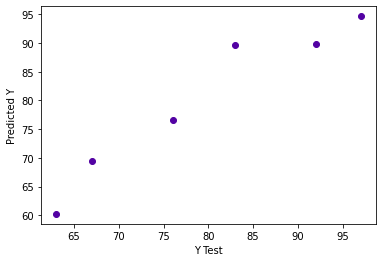

In [66]:
plt.scatter(y_test,x_predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
#Sample Data for predicting the win with the model
data ={'R' : 0.959398,
        'AB' : 0.830084,
        'H' : 1.723726,
        '2B' :1.556538 ,
        '3B' : 1.010845,
        'HR' : -0.765863,
       'BB' : -1.536359,
       'SO' :-2.727623,
      'SB' :0.905953,
      'RA': -0.664514,         
      'CG':-0.307098,
      'SHO':-0.787002,
      'SV':1.532753,
      'E':-0.348265}

index = [1]
newentry_df = pd.DataFrame(data,index)
newentry_df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
1,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.307098,-0.787002,1.532753,-0.348265


In [68]:
#Predict for new sample entry
#models[0] ===LinearRegression()
BaseBallWin_predict =Final_mod.predict(newentry_df)
print(BaseBallWin_predict)

[92.66170545]


# Save Model

In [69]:

import pickle
file = 'BaseBallWin_predict'
save = pickle.dump(Final_mod,open('BaseBallWin_predict.pkl','wb'))

# Conclusion

In [70]:
#models[2] ===LinearRegression()
pickled_BaseBallWin_predict= pickle.load(open('BaseBallWin_predict.pkl','rb'))
result=pickled_BaseBallWin_predict.score(x_test,y_test)
print(result)

conclusion=pd.DataFrame([pickled_BaseBallWin_predict.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion.T

0.923538070808909


,Predicted,Original
0,69.529287,67.0
1,60.254632,63.0
2,94.649570,97.0
3,76.585741,76.0
4,89.730625,83.0
5,89.789821,92.0
